# This notebook briefly summarises steps required to get prepared for the workshop

- The following instructions use a ***local installation of pyaerocom***
- This means, that the processing may be slow if you work via VPN
- See Hans' introduction that introduces how to run pyaerocom via qlogin

## Installation of pyaerocom and preparing access to PPI via mount

Please follow the instructions provided [here](https://github.com/metno/pyaerocom#installation). In short:

Make sure to use the [conda package manager](https://docs.conda.io/projects/conda/en/latest/user-guide/install/) and install the latest pyaerocom release (including all requirements) via:

### Test installation

Simply try importing pyaerocom (and print version):

In [1]:
import pyaerocom as pya
pya.__version__

'0.11.0.dev1'

This should be 0.10.0 (or later, e.g. 0.11.0, if everything goes well until the workshop).

### Mount PPI locally

When pyaerocom is imported it will try to see if lustre is mounted, either in root `/` or in the user home `~` directory, i.e. please mount `lustre/storeA` either in root `/` or in `~`. You can check access to lustre via:

In [2]:
pya.const.has_access_lustre

True

If this returns `True` then you are all set for using pyaerocom. 

**Note**, if you mounted lustre after starting this notebook and importing pyaerocom (cell 2), you will have to restart the notebook kernel and reimport pyaerocom for it to setup access to PPI!

#### ... if pyaerocom does not manage to get access to PPI, you can also add directories, e.g.

In [3]:
model_search_dir = '/lustre/storeA/project/aerocom/aerocom-users-database/AEROCOM-PHASE-III-2019'

This directory contains recent AeroCom phase III simulations. You can check

In [4]:
pya.const.add_data_search_dir(model_search_dir)

You can see all directories where pyaerocom will search for data via:

In [5]:
pya.const.DATA_SEARCH_DIRS

['/lustre/storeA/project/aerocom/aerocom1/',
 '/lustre/storeA/project/aerocom/aerocom2/',
 '/lustre/storeA/project/aerocom/aerocom-users-database/CMIP6',
 '/lustre/storeA/project/aerocom/aerocom-users-database/C3S-Aerosol',
 '/lustre/storeA/project/aerocom/aerocom-users-database/ECLIPSE',
 '/lustre/storeA/project/aerocom/aerocom-users-database/SATELLITE-DATA/',
 '/lustre/storeA/project/aerocom/aerocom-users-database/CCI-Aerosol/CCI_AEROSOL_Phase2/',
 '/lustre/storeA/project/aerocom/aerocom-users-database/ACCMIP/',
 '/lustre/storeA/project/aerocom/aerocom-users-database/ECMWF/',
 '/lustre/storeA/project/aerocom/aerocom2/EMEP_COPERNICUS/',
 '/lustre/storeA/project/aerocom/aerocom2/EMEP/',
 '/lustre/storeA/project/aerocom/aerocom2/EMEP_GLOBAL/',
 '/lustre/storeA/project/aerocom/aerocom2/EMEP_SVN_TEST/',
 '/lustre/storeA/project/aerocom/aerocom2/NorESM_SVN_TEST/',
 '/lustre/storeA/project/aerocom/aerocom2/INCA/',
 '/lustre/storeA/project/aerocom/aerocom-users-database/HTAP-PHASE-I/',
 '/lu

## Getting started with the analysis

This is a veeery brief introduction into the main API. Please checkout the [tutorials](https://github.com/metno/pyaerocom-tutorials) for more examples.

### Finding model data

Use the following method, which performs wildcard search for subdirectories in all data search directories registered. Let's search for AeroCom median fields from our optics paper:

In [6]:
pya.browse_database('*AEROCOM*MEDIAN*GLISSETAL*')


Pyaerocom ReadGridded
---------------------
Data ID: AEROCOM-MEDIAN-2x3-GLISSETAL2020-1_AP3-CTRL
Data directory: /lustre/storeA/project/aerocom/aerocom-users-database/AEROCOM-PHASE-III-2019/AEROCOM-MEDIAN-2x3-GLISSETAL2020-1_AP3-CTRL/renamed
Available experiments: ['AP3']
Available years: [2010]
Available frequencies ['monthly']
Available variables: ['abs440aer', 'abs440aerdiv', 'abs440aerq1', 'abs440aerq3', 'abs550aer', 'abs550aerdiv', 'abs550aerq1', 'abs550aerq3', 'abs550bc', 'abs550bcdiv', 'abs550bcq1', 'abs550bcq3', 'abs550dust', 'abs550dustdiv', 'abs550dustq1', 'abs550dustq3', 'abs550oa', 'abs550oadiv', 'abs550oaq1', 'abs550oaq3', 'abs870aer', 'abs870aerdiv', 'abs870aerq1', 'abs870aerq3', 'ac550aer', 'ac550aerdiv', 'ac550aerq1', 'ac550aerq3', 'ang4487aer', 'ang4487aerdiv', 'ang4487aerq1', 'ang4487aerq3', 'drybc', 'drybcdiv', 'drybcq1', 'drybcq3', 'drydust', 'drydustdiv', 'drydustq1', 'drydustq3', 'dryno3', 'dryno3div', 'dryno3q1', 'dryno3q3', 'dryoa', 'dryoadiv', 'dryoaq1', 'dryo

['AEROCOM-MEDIAN-2x3-GLISSETAL2020-1_AP3-CTRL',
 'AEROCOM-MEDIAN-1x1-GLISSETAL2020-1_AP3-CTRL']

Initate reader for 2x3 data:

In [7]:
modelreader = pya.io.ReadGridded(data_id='AEROCOM-MEDIAN-2x3-GLISSETAL2020-1_AP3-CTRL')
modelreader


Pyaerocom ReadGridded
---------------------
Data ID: AEROCOM-MEDIAN-2x3-GLISSETAL2020-1_AP3-CTRL
Data directory: /lustre/storeA/project/aerocom/aerocom-users-database/AEROCOM-PHASE-III-2019/AEROCOM-MEDIAN-2x3-GLISSETAL2020-1_AP3-CTRL/renamed
Available experiments: ['AP3']
Available years: [2010]
Available frequencies ['monthly']
Available variables: ['abs440aer', 'abs440aerdiv', 'abs440aerq1', 'abs440aerq3', 'abs550aer', 'abs550aerdiv', 'abs550aerq1', 'abs550aerq3', 'abs550bc', 'abs550bcdiv', 'abs550bcq1', 'abs550bcq3', 'abs550dust', 'abs550dustdiv', 'abs550dustq1', 'abs550dustq3', 'abs550oa', 'abs550oadiv', 'abs550oaq1', 'abs550oaq3', 'abs870aer', 'abs870aerdiv', 'abs870aerq1', 'abs870aerq3', 'ac550aer', 'ac550aerdiv', 'ac550aerq1', 'ac550aerq3', 'ang4487aer', 'ang4487aerdiv', 'ang4487aerq1', 'ang4487aerq3', 'drybc', 'drybcdiv', 'drybcq1', 'drybcq3', 'drydust', 'drydustdiv', 'drydustq1', 'drydustq3', 'dryno3', 'dryno3div', 'dryno3q1', 'dryno3q3', 'dryoa', 'dryoadiv', 'dryoaq1', 'dryo

### Read AOD at 550nm

In [8]:
modelaod = modelreader.read_var('od550aer', start=2010)
modelaod

pyaerocom.GriddedData
Grid data: <iris 'Cube' of od550aer / (1) (time: 12; latitude: 90; longitude: 120)>

Resample to yearly and plot:

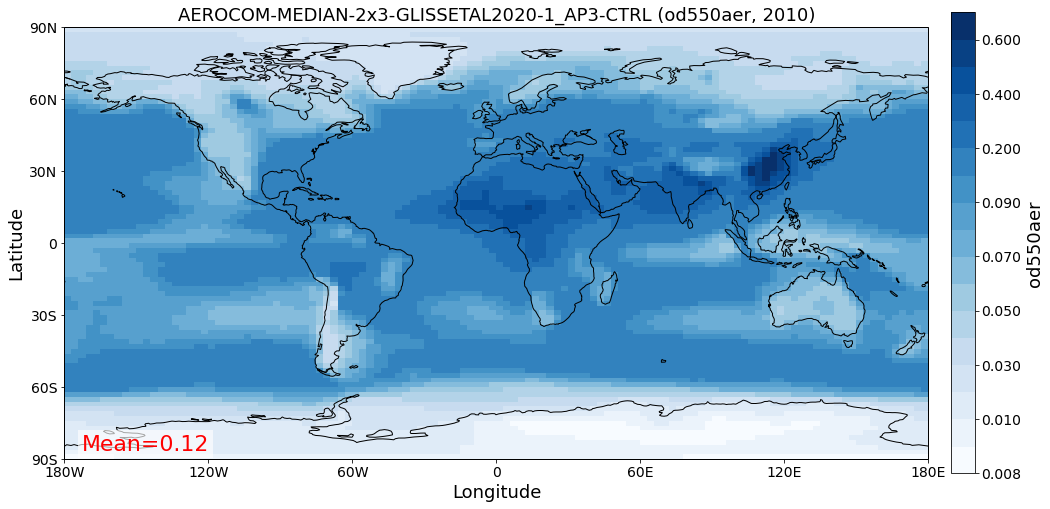

In [9]:
modelaod.resample_time('yearly').quickplot_map();

Note that the yearly resampling was only applied to the plot data and modelaod is still in monthly resolution...

### Search and read observation data

Search for AERONET level 2, daily AOD sun photometer data.

In [10]:
pya.browse_database('*Aeronet*Lev2*daily*')


Dataset name: AeronetSunV2Lev2.daily
Data directory: /lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/AeronetRaw2.0/renamed
Supported variables: ['od1640aer', 'od1020aer', 'od870aer', 'od675aer', 'od667aer', 'od555aer', 'od551aer', 'od532aer', 'od531aer', 'od500aer', 'od440aer', 'od380aer', 'od340aer', 'ang4487aer', 'od550aer', 'ang4487aer_calc']
Last revision: 20180519

Dataset name: AeronetSDAV2Lev2.daily
Data directory: /lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/AeronetSun2.0.SDA.daily/renamed
Supported variables: ['date', 'time', 'julien_day', 'od500aer', 'od500lt1aer', 'od500gt1aer', '_eta500lt1', '_aod500aer_fiterr', '_aod500lt1aer_rmse', '_aod500gt1aer_rmse', '_eta500lt1_rmse', '_ang50aer', 'od870aer', 'od675aer', 'od667aer', 'od555aer', 'od551aer', 'od532aer', 'od531aer', 'od500aer_input', 'od490aer', 'od443aer', 'od440aer', 'od412aer', 'od380aer', 'ang4487aer', 'od550aer', 'od550gt1aer', 'od550lt1aer']
Last revision: 20180519

Dataset name: AeronetInvV2Lev

['AeronetSunV2Lev2.daily',
 'AeronetSDAV2Lev2.daily',
 'AeronetInvV2Lev2.daily',
 'AeronetSunV3Lev2.daily',
 'AeronetSDAV3Lev2.daily',
 'AeronetInvV3Lev2.daily']

In [11]:
obsreader = pya.io.ReadUngridded()

The following line will read all observations from AERONET level 2 daily dataset. This may take a while, especially if you work via VPN. Enough time to grab a coffee.

In [12]:
obsdata = obsreader.read('AeronetSunV3Lev2.daily', 'od550aer')

Plot all site locations

### Co-locate model AOD with AERONET

Require high temporal coverage (22 daily values in obs

In [13]:
coldata = pya.colocation.colocate_gridded_ungridded(modelaod, obsdata, start=2010, ts_type='monthly')
coldata

<xarray.DataArray 'od550aer' (data_source: 2, time: 12, station_name: 264)>
array([[[       nan, 0.11884998,        nan, ...,        nan,
                nan, 0.22213848],
        [       nan, 0.13227382,        nan, ...,        nan,
                nan, 0.42976184],
        [       nan, 0.14692617,        nan, ...,        nan,
                nan, 0.91985307],
        ...,
        [0.11797653, 0.11600433,        nan, ...,        nan,
                nan, 0.39411515],
        [0.13223569, 0.19505854,        nan, ...,        nan,
                nan, 0.26176478],
        [       nan,        nan,        nan, ...,        nan,
                nan, 0.37904951]],

       [[0.09019375, 0.16449708, 0.13847077, ..., 0.26588506,
         0.06543267, 0.20029162],
        [0.08468837, 0.24676725, 0.18913695, ..., 0.29025093,
         0.0813554 , 0.29343474],
        [0.07235847, 0.22465934, 0.67847669, ..., 0.37687346,
         0.07710935, 0.75587553],
        ...,
        [0.09586523, 0.1953937 ,

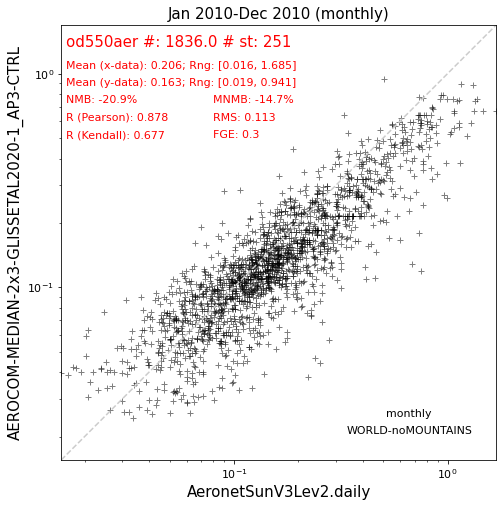

In [14]:
coldata.plot_scatter(loglog=True)

#### A word on temporal resampling

By default, pyaerocom will resample time using a ca 25% coverage constraint, and using a hierachical scheme (i.e. stepwise resampling). This information can be accessed via:

In [15]:
pya.const.OBS_MIN_NUM_RESAMPLE

{'yearly': {'monthly': 3},
 'monthly': {'daily': 7},
 'daily': {'hourly': 6},
 'hourly': {'minutely': 15}}

This means if, e.g. an observation is supposed to be resampled from hourly to monthly, it has to have at least:

- 6 hourly values to get a daily averages
- 7 daily avearges to get a monthly average

Whether this is applied or not, can be controlled via:

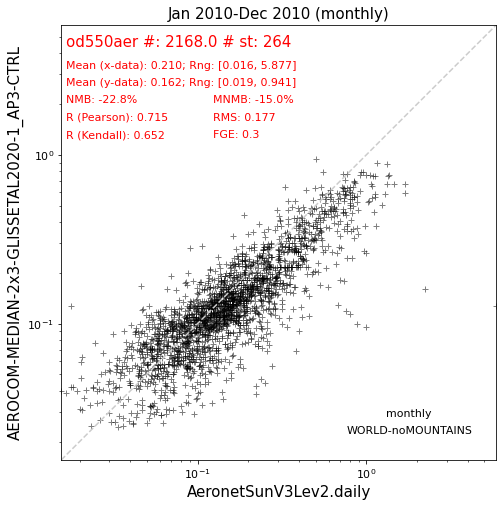

In [16]:
pya.colocation.colocate_gridded_ungridded(modelaod, obsdata, start=2010, ts_type='monthly', apply_time_resampling_constraints=False).plot_scatter(loglog=True)

You can also provide a custom resampling scheme:

In [17]:
MY_MIN_NUM_OBS = {
    'yearly': {'monthly': 3},
    'monthly': {'daily': 22}
    }

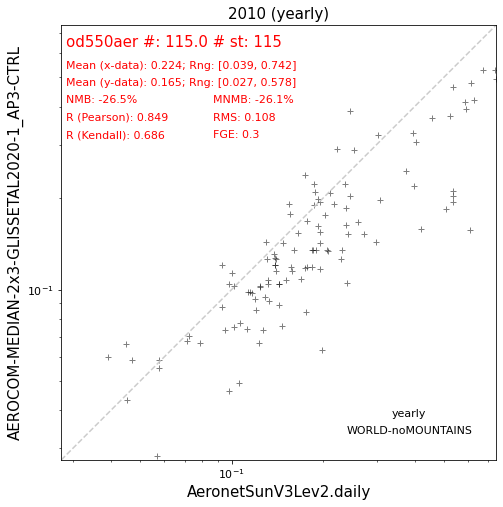

In [18]:
pya.colocation.colocate_gridded_ungridded(modelaod, obsdata, start=2010, ts_type='yearly', min_num_obs=MY_MIN_NUM_OBS).plot_scatter(loglog=True)

#### Applying other aggregators than mean

Similar to `min_num_obs`, `resample_how` can be specified to define what aggregator should be used for resampling:

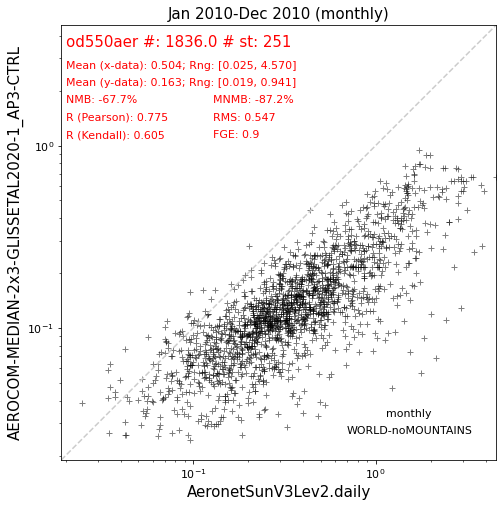

In [19]:
pya.colocation.colocate_gridded_ungridded(modelaod, obsdata, start=2010, ts_type='monthly', resample_how='max').plot_scatter(loglog=True)

(which does not make a lot of sense in this example but can be used, e.g. for O3 when resampling from hourly to daily).